## Advanced Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 999)

# Set pretty printing format for floats
pd.set_option('float_format', '{:.3f}'.format)

### Reading the data

In [3]:
housing_data = pd.read_csv('train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspecting the data

#### Checking the data info

In [4]:
# Describing the dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

It can be seen that there are a lot of columns like PoolQC, MiscFeature etc where the count of not null values is considerably fewer than the total counts.
<br>These columns will be processed during data cleaning.

Columns like MSSubClass, OverallQual & OverallCond have numeric values, but as per the data dictionary and the values present, they are categorical columns. These can be converted to categorical columns.

In [5]:
# Converting MSSubClass, OverallQual & OverallCond to categorical
housing_data[['MSSubClass','OverallQual','OverallCond']] = housing_data[['MSSubClass','OverallQual','OverallCond']].astype('object')

#### Describing the data

In [6]:
# Describing the numeric columns
housing_data.drop('Id',axis=1).describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,70.050,10516.828,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,24.285,9981.265,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,21.000,1300.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
1%,21.000,1680.000,1899.180,1950.000,0.000,0.000,0.000,0.000,0.000,520.000,0.000,0.000,692.180,0.000,0.000,1.000,0.000,1.000,1.000,3.000,0.000,1916.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,61815.970
5%,34.000,3311.700,1916.000,1950.000,0.000,0.000,0.000,0.000,519.300,672.950,0.000,0.000,848.000,0.000,0.000,1.000,0.000,2.000,1.000,4.000,0.000,1930.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2006.000,88000.000
10%,44.000,5000.000,1924.900,1950.000,0.000,0.000,0.000,74.900,636.900,756.900,0.000,0.000,912.000,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1945.000,1.000,240.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,2006.000,106475.000
25%,59.000,7553.500,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,69.000,9478.500,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,80.000,11601.500,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000


Some columns like LotArea, LotFrontage, MasVnrArea etc will need outlier treatment. These columns will be processed during data processing.

#### Numerical and Categorical columns

In [7]:
# creating two lists for numerical and categorical colums. These will be useful in subsequent data processing
numeric = [f for f in housing_data.columns if housing_data.dtypes[f] != 'object']
numeric.remove('SalePrice')
numeric.remove('Id')
categorical = [f for f in housing_data.columns if housing_data.dtypes[f] == 'object']
print('Numeric:- '+str(len(numeric)))
print('Categorical:- '+str(len(categorical)))

Numeric:- 33
Categorical:- 46


We have 33 numeric columns and 46 categorical columns.

#### Checking the data for duplicates

In [8]:
# Checking for duplicate rows
housing_data[housing_data.duplicated(subset = 'Id')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no duplicate rows.

In [9]:
# Id can be dropped since it won't be used for analysis
housing_data.drop(['Id'],axis=1,inplace=True)
# This will be used for subsequent column dropping
cols_to_drop = []

#### Checking the null value percentage

In [10]:
# Checking null values %ages for all the columns
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

MSSubClass       0.000
MSZoning         0.000
LotFrontage     17.740
LotArea          0.000
Street           0.000
Alley           93.770
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.550
MasVnrArea       0.550
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.530
BsmtCond         2.530
BsmtExposure     2.600
BsmtFinType1     2.530
BsmtFinSF1       0.000
BsmtFinType2     2.600
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.070
1stFlrSF         0.000
2ndFlrSF   

#### Null Value treatment

Although there are columns with a lot of missing values, some of them are categorical. A missing value here would mean  abscence of property described by attribute. The null values here can be replaced with a new category 'None'

In [11]:
cols = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
housing_data[cols] = housing_data[cols].fillna('None')

In [12]:
# LotFrontage - Null value treatment
# LotFrontage has around 17.74% null values.
# Since the minimum required LotFrontage depends on the zoning area, the null values can be imputed with the neighbourhood wise averages for LotFrontage
housing_data.LotFrontage = housing_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.mean()))

In [13]:
# MasVnrArea - Null value treatment
# MasVnrArea = 0 where MasVnrType = None or NA
housing_data['MasVnrArea'] = housing_data.MasVnrArea.fillna(0)

In [14]:
# Electrical - Null value treatment
# Replacing null values by the most frequent value since the number of null values is very less.
housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0], inplace=True)

In [15]:
# GarageYrBlt - Null value treatment
# It can be implied that the value is null for houses where Garage is not present at all
# These null values can be replaced with Year of sale, since then it will make the age of garage at the time of sale 0 and hence, can be said to not affect the price of sale.
housing_data['GarageYrBlt'].fillna(housing_data['YrSold'], inplace=True)

In [16]:
# Checking the null value %ages again
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

MSSubClass      0.000
MSZoning        0.000
LotFrontage     0.000
LotArea         0.000
Street          0.000
Alley           0.000
LotShape        0.000
LandContour     0.000
Utilities       0.000
LotConfig       0.000
LandSlope       0.000
Neighborhood    0.000
Condition1      0.000
Condition2      0.000
BldgType        0.000
HouseStyle      0.000
OverallQual     0.000
OverallCond     0.000
YearBuilt       0.000
YearRemodAdd    0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
MasVnrType      0.000
MasVnrArea      0.000
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
BsmtQual        0.000
BsmtCond        0.000
BsmtExposure    0.000
BsmtFinType1    0.000
BsmtFinSF1      0.000
BsmtFinType2    0.000
BsmtFinSF2      0.000
BsmtUnfSF       0.000
TotalBsmtSF     0.000
Heating         0.000
HeatingQC       0.000
CentralAir      0.000
Electrical      0.000
1stFlrSF        0.000
2ndFlrSF        0.000
LowQualFinSF    0.000
GrLivArea 

All the null values have been treated now. Proceeding with EDA.

#### EDA, Data Cleaning and Derived Metrics Creation

#### Numeric columns

In [17]:
# Creating a method for outlier treatment
def remove_outlier(df_in, col_name, lower, upper):
    quantile_lower = df_in[col_name].quantile(lower)
    quantile_upper = df_in[col_name].quantile(upper)
    df_in[col_name][df_in[col_name] <= quantile_lower] = quantile_lower
    df_in[col_name][df_in[col_name] >= quantile_upper] = quantile_upper
    return df_in

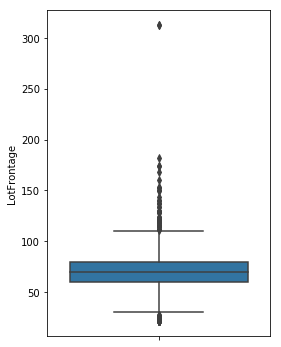

In [18]:
# Plotting the spread of 'LotFrontage'
plt.figure(figsize=(4, 6))
sns.boxplot(y= 'LotFrontage', data=housing_data)

In [19]:
# Treating LotFrontage for outlier
housing_data = remove_outlier(housing_data,'LotFrontage',0.05,0.95)

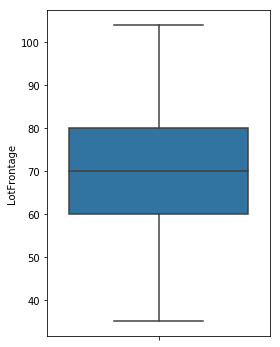

In [20]:
# Plotting the spread of 'LotFrontage' after outlier treatment
plt.figure(figsize=(4, 6))
sns.boxplot(y= 'LotFrontage', data=housing_data)

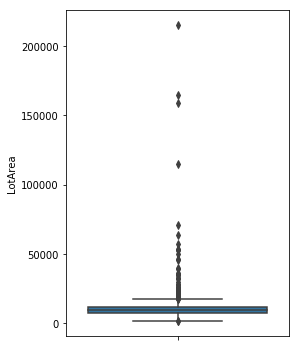

In [21]:
# Plotting the spread of 'LotArea'
plt.figure(figsize=(4, 6))
sns.boxplot(y= 'LotArea', data=housing_data)

In [22]:
# Treating LotFrontage for outlier
housing_data = remove_outlier(housing_data,'LotArea',0.05,0.95)

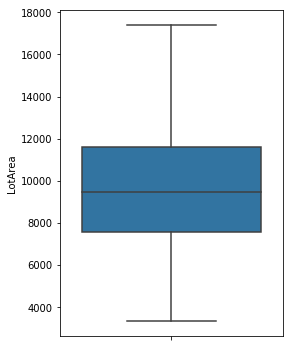

In [23]:
# Plotting the spread of 'LotArea' after outlier treatment
plt.figure(figsize=(4, 6))
sns.boxplot(y= 'LotArea', data=housing_data)

In [24]:
# A new column 'AgeAtSale' can be created. It shows the age of the house when it was sold
housing_data['AgeAtSale'] = housing_data['YrSold'] - housing_data['YearBuilt']
# A new column Remodelled can be created. It shows the years between the year of sale and the year when remodeling was done.
housing_data['AgeRemodAtSale'] = housing_data['YrSold'] - housing_data['YearRemodAdd']
# Columns 'YrSold', 'YearBuilt', and 'YearRemodAdd' can be dropped
# Also 'MoSold'  can be dropped since month isn't going to have much of an effect on SalePrice
cols_to_drop.extend(['YrSold', 'YearBuilt', 'YearRemodAdd', 'MoSold'])

In [25]:
# Analysing 'MasVnrArea'
# Checking the %age of rows where MasVnrArea = 0 
round(100*len(housing_data[housing_data.MasVnrArea == 0].index)/len(housing_data),2)

59.52

~60% of values for 'MasVnrArea' are 0. Alo, it can be assumed that the column 'MasVnrType' captures the effect of Masonry Veneer on Sale Price. This column is liable to be ignored during feature selection process.

In [26]:
cols_to_drop.extend(['MasVnrArea'])

In [27]:
# Analysing columns related to basement square footage
# It can be seen that BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF
# This can be validated by running the following command
# len(housing_data[housing_data['BsmtFinSF1'] + housing_data['BsmtFinSF2'] + housing_data['BsmtUnfSF'] == housing_data.TotalBsmtSF])
# The above statement outputs 1460 as output. Which means that the expression holds true for all the rows.
cols_to_drop.extend(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'])

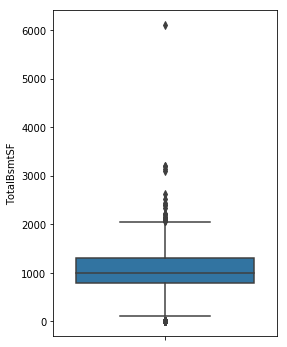

In [28]:
# Plotting the spread of 'TotalBsmtSF'
plt.figure(figsize=(4, 6))
sns.boxplot(y= 'TotalBsmtSF', data=housing_data)

In [29]:
# Treating TotalBsmtSF for outliers
housing_data = remove_outlier(housing_data,'TotalBsmtSF',0,0.95)

In [30]:
# Analysing columns related to living area square footage
# It can be seen that 1stFlrSF + 2ndFlrSF + LowQualFinSF = GrLivArea
# This can be validated by running the following command
# len(housing_data[housing_data['1stFlrSF'] + housing_data['2ndFlrSF'] + housing_data['LowQualFinSF'] == housing_data.GrLivArea])
# The above statement outputs 1460 as output. Which means that the expression holds true for all the rows.
cols_to_drop.extend(['1stFlrSF','2ndFlrSF','LowQualFinSF'])

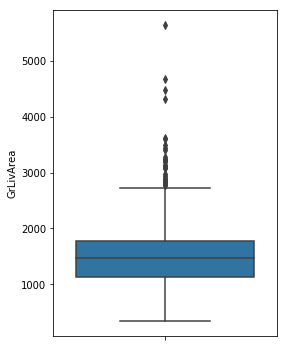

In [31]:
# Plotting the spread of 'GrLivArea'
plt.figure(figsize=(4, 6))
sns.boxplot(y= 'GrLivArea', data=housing_data)

In [32]:
# Treating GrLivArea for outliers
housing_data = remove_outlier(housing_data,'GrLivArea',0.05,0.95)

In [33]:
# Analysing GarageYrBlt
# Checking the %age of houses where the Garage was built when the house was constructed
round(len(housing_data[housing_data.GarageYrBlt == housing_data.YearBuilt].index)*100/len(housing_data.index),2)

74.73

As can be seen, 75% of the garages were built at the same time as the houses. Another 5.5% of the values were null values since Garage is not present with the house. And the impact of the age of a Garage will be factored in with the 'GarageFinish' and the 'GarageQual' columns. This can be dropped.

In [34]:
cols_to_drop.extend(['GarageYrBlt'])

In [35]:
# Analyzing the number of bathrooms
# Checking the number of full basement bathrooms
housing_data.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [36]:
# Checking the number of half basement bathrooms
housing_data.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

It can be seen that ~59% (856/1460) values for BsmtFullBath and ~95% (1378/1460) values for BsmtHalfBath are zero. These can be added to FullBath and HalfBath columns respectively.

In [37]:
housing_data['FullBath'] = housing_data['FullBath']+housing_data['BsmtFullBath']
housing_data['HalfBath'] = housing_data['HalfBath']+housing_data['BsmtHalfBath']
cols_to_drop.extend(['BsmtFullBath','BsmtHalfBath'])

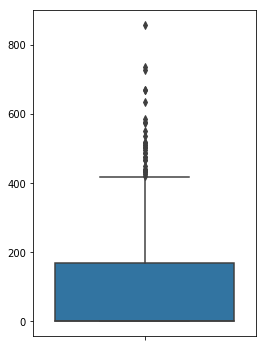

In [38]:
# Analysing WoodDeckSF
plt.figure(figsize=(4, 6))
sns.boxplot(y= ['WoodDeckSF'], data=housing_data)

It can be seen that the there are higher order outliers. Treating them.

In [39]:
housing_data = remove_outlier(housing_data,'WoodDeckSF',0,0.95)

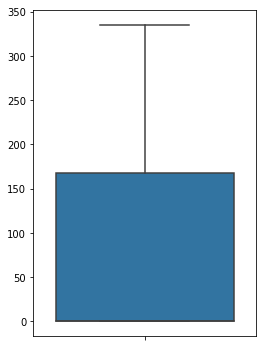

In [40]:
# Spread of WoodDeckSF after outlier treatment
plt.figure(figsize=(4, 6))
sns.boxplot(y= ['WoodDeckSF'], data=housing_data)

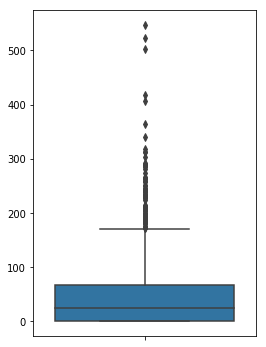

In [41]:
# Analysing OpenPorchSF
plt.figure(figsize=(4, 6))
sns.boxplot(y= ['OpenPorchSF'], data=housing_data)

In [42]:
# Treating the higher order outliers
housing_data = remove_outlier(housing_data,'OpenPorchSF',0,0.95)

In [43]:
# Analysing EnclosedPorch, 3SsnPorch and ScreenPorch
# It can be seen that these three columns have very less non-zero values.
print(round(100*len(housing_data[housing_data.EnclosedPorch != 0].index)/len(housing_data.index),2))
print(round(100*len(housing_data[housing_data['3SsnPorch'] != 0].index)/len(housing_data.index),2))
print(round(100*len(housing_data[housing_data.ScreenPorch != 0].index)/len(housing_data.index),2))

14.25
1.64
7.95


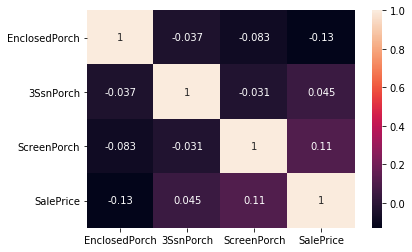

In [44]:
# Checking the correlation of EnclosedPorch, 3SsnPorch and ScreenPorch with SalePrice
sns.heatmap(housing_data[['EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']].corr(),annot=True)

It can be seen that these features don't affect the price much. Also, EnclosedPorch, 3SsnPorch and ScreenPorch are quite similar(they all are types of Porch that are covered in some way) and can be covered under one category - CoveredPorch

In [45]:
housing_data['CoveredPorch'] = housing_data['EnclosedPorch']+housing_data['3SsnPorch']+housing_data['ScreenPorch']
cols_to_drop.extend(['EnclosedPorch','3SsnPorch','ScreenPorch'])

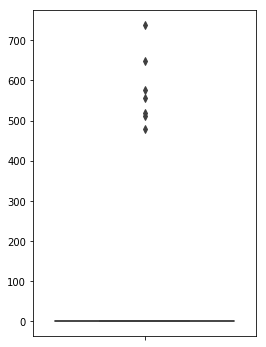

In [46]:
# Analysing PoolArea
plt.figure(figsize=(4, 6))
sns.boxplot(y= ['PoolArea'], data=housing_data)

In [47]:
# checking the percentage of non-zero values for PoolArea
round(100*len(housing_data[housing_data.PoolArea!=0])/len(housing_data.index),2)

0.48

Only 0.48% values are non-zero values. This column can be dropped.

In [48]:
cols_to_drop.extend(['PoolArea'])

In [49]:
cols_to_drop

['YrSold',
 'YearBuilt',
 'YearRemodAdd',
 'MoSold',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GarageYrBlt',
 'BsmtFullBath',
 'BsmtHalfBath',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

In [50]:
# Dropping the columns determined above
housing_data.drop(columns=cols_to_drop,axis=1,inplace=True)

In [51]:
# Reindexing the columns for better comprehension of the Dataframe
housing_data = housing_data.reindex(columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotConfig', 'Street',
                                             'Alley','LotShape', 'LandContour', 'Utilities', 'LandSlope',
                                             'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                             'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                             'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                                             'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                             'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
                                             'Electrical', 'GrLivArea', 'FullBath', 'HalfBath',
                                             'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                                             'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
                                             'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
                                             'WoodDeckSF', 'OpenPorchSF', 'CoveredPorch', 'PoolQC', 'Fence', 'MiscFeature',
                                             'MiscVal', 'SaleType', 'SaleCondition', 'AgeAtSale',
                                             'AgeRemodAtSale', 'SalePrice'])

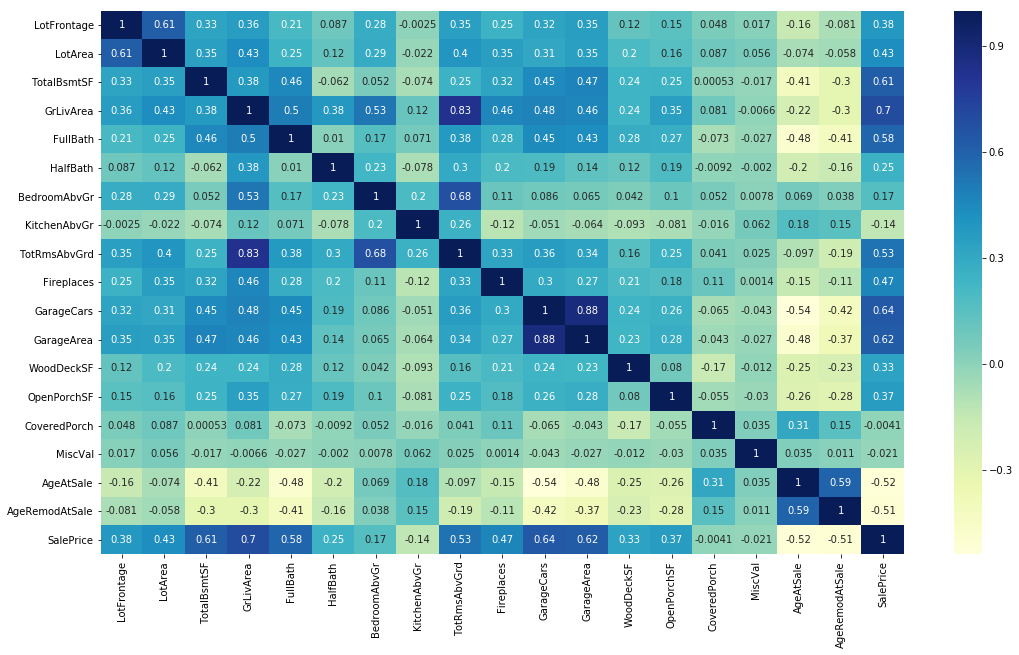

In [52]:
# Checking the correlation of the numberical columns with each other.
# Figure size
plt.figure(figsize=(18,10))

# Heatmap
sns.heatmap(housing_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Observations from heat map:
1. Among numerical features, GrLivArea has the most influence on the SalePrice.
2. GarageCars, TotalBsmtSF are some other features with high influence on sale price.
3. Sale Price is negatively affected by AgeAtSale and AgeRemodAtSale, which is quite natural.
4. TotalRmsAbvGrd is highly corelated to GrLivArea, which is obvious.
5. GarageCars has a high corelation with GarageArea, which again, is obvious.

#### Categorical Columns

In [53]:
# We have the following categorical columns
categorical

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

To analyse things quickly, plotting the box plots for all categorical columns in one go.

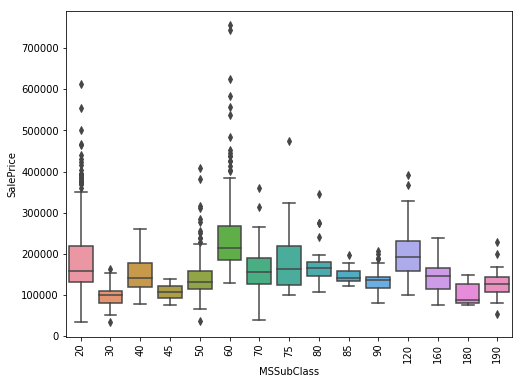

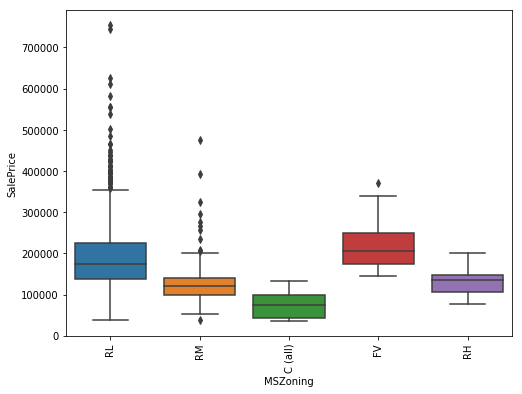

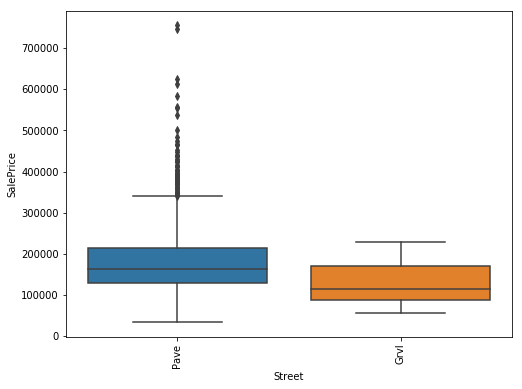

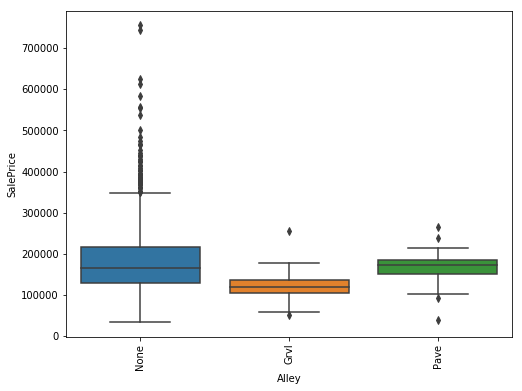

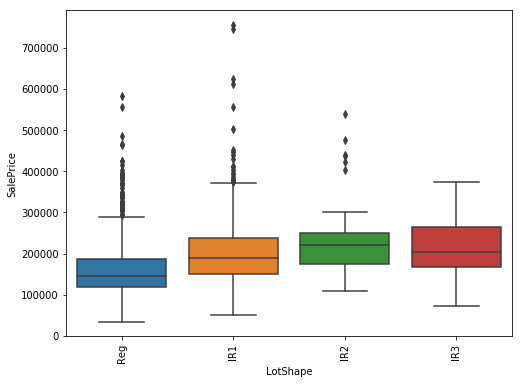

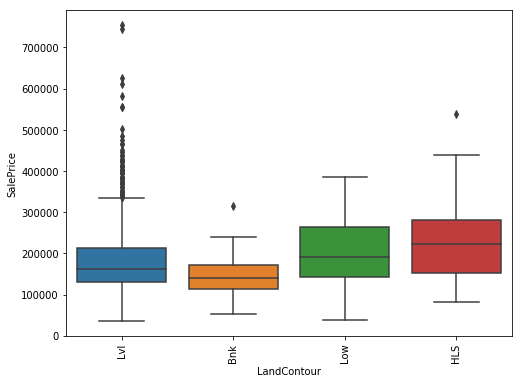

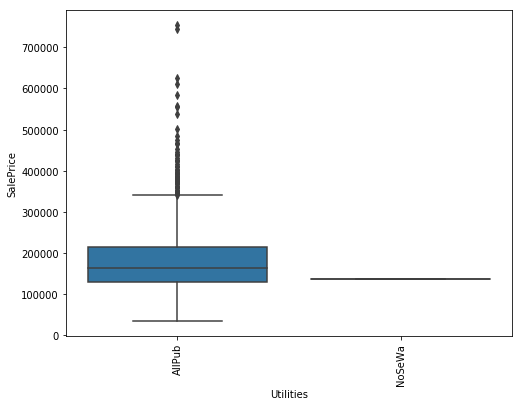

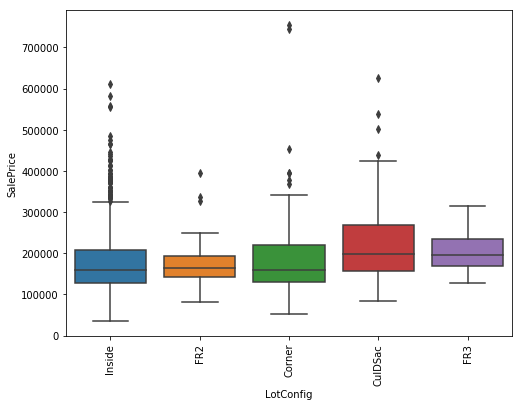

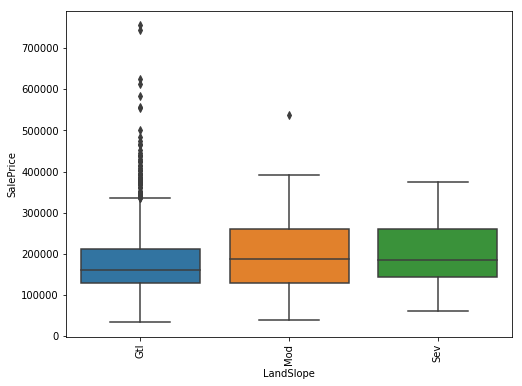

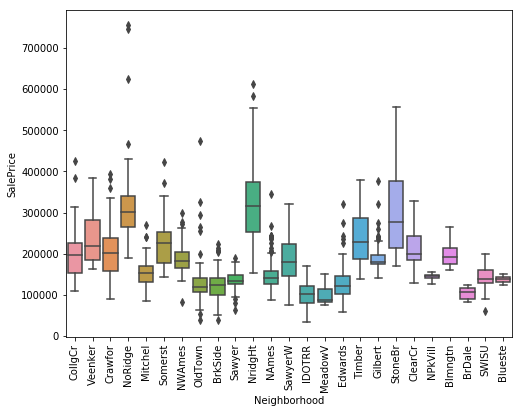

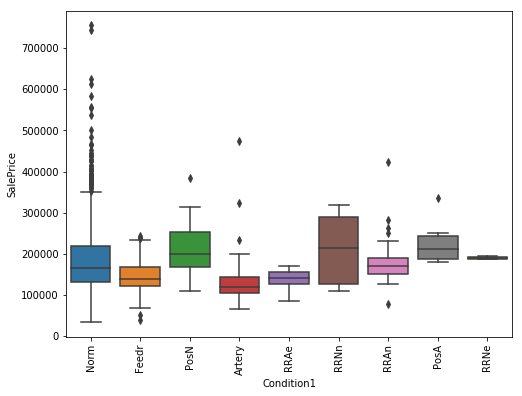

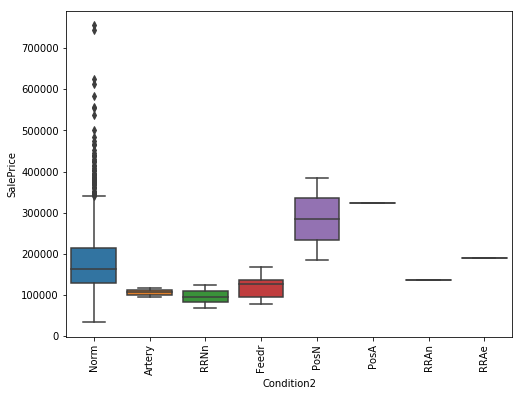

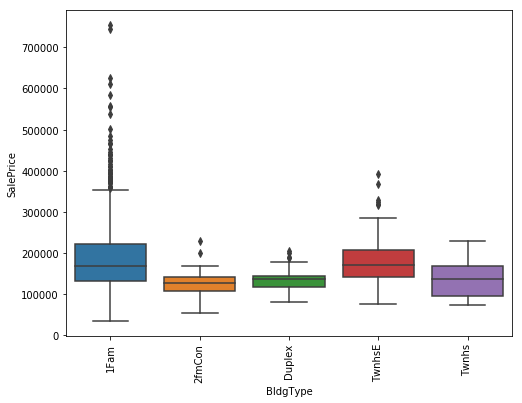

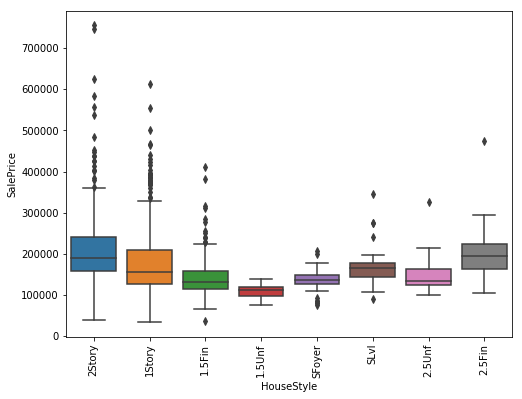

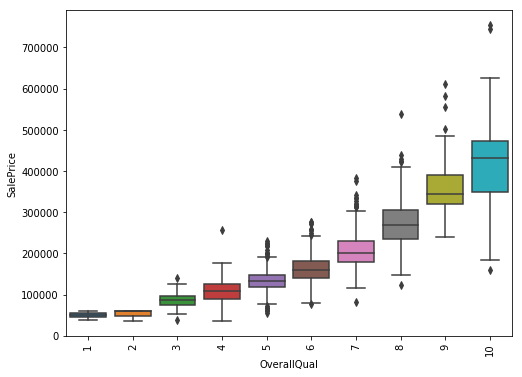

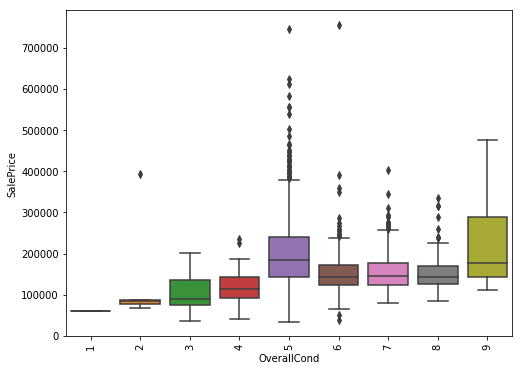

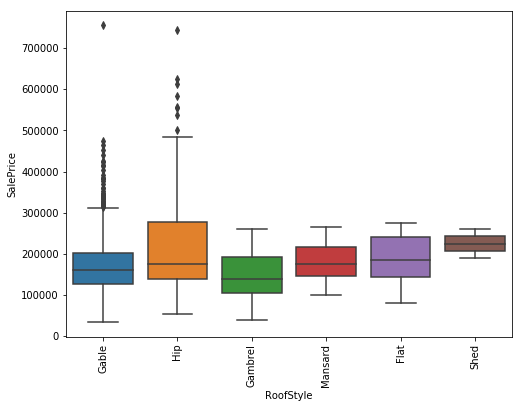

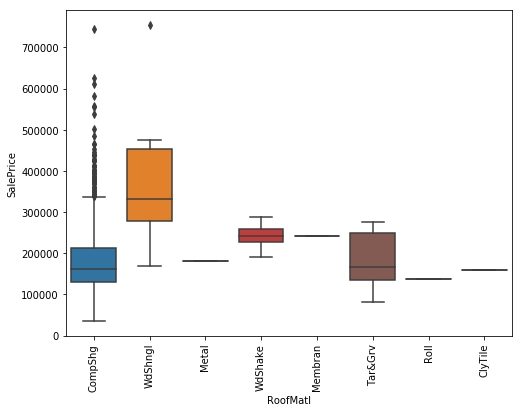

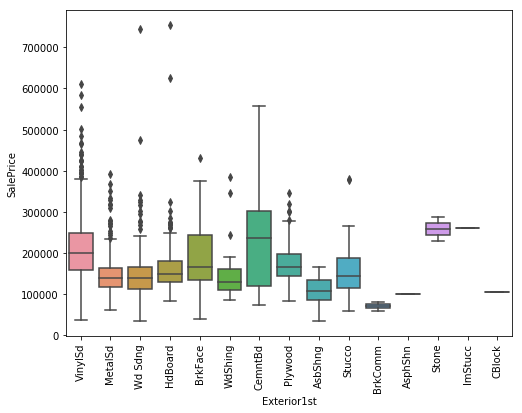

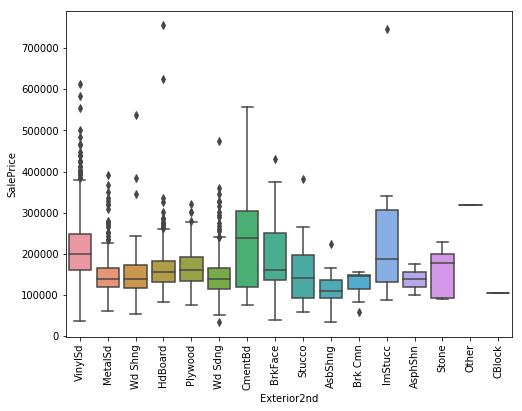

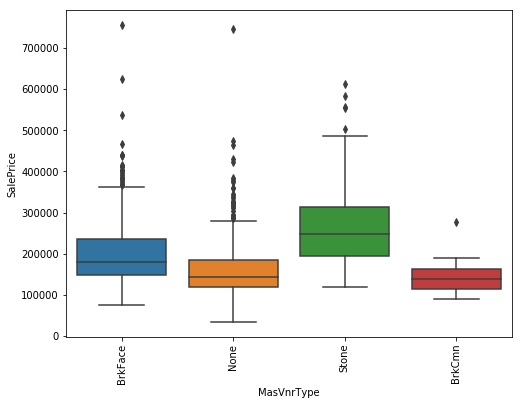

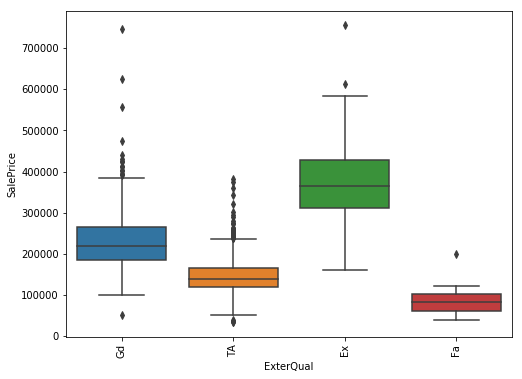

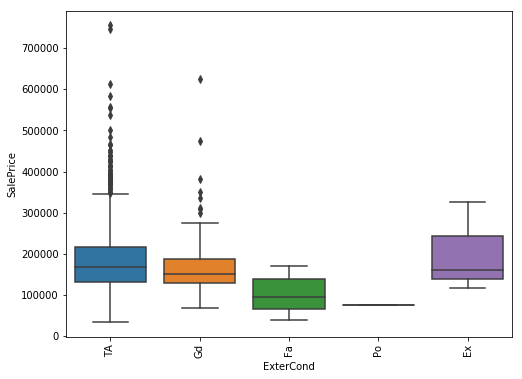

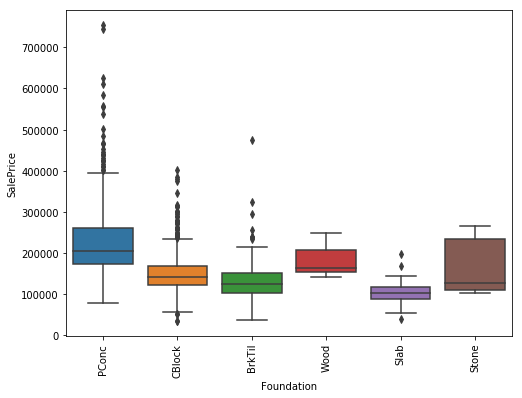

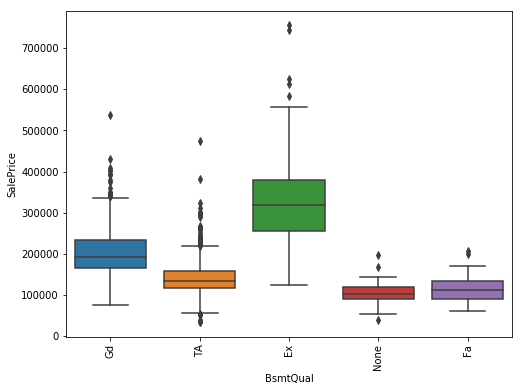

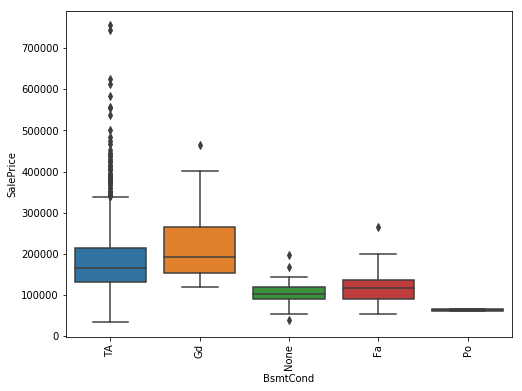

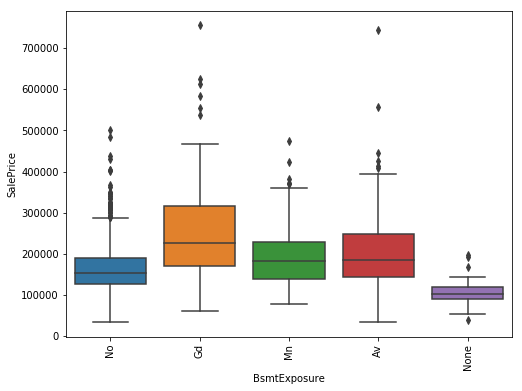

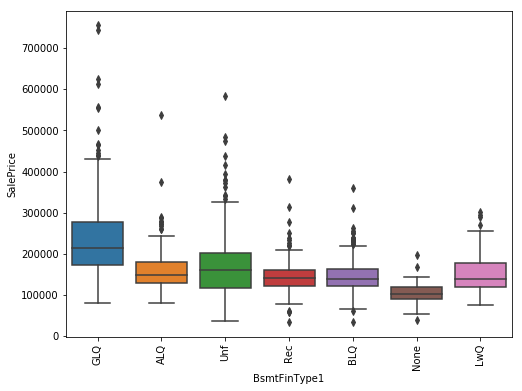

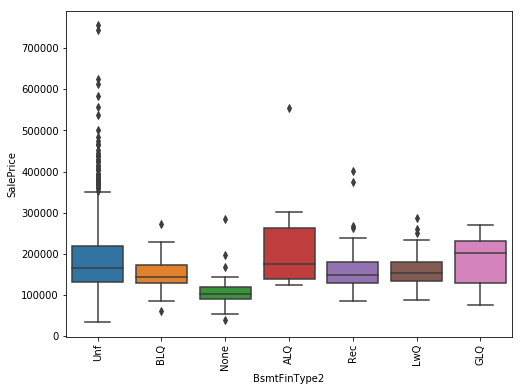

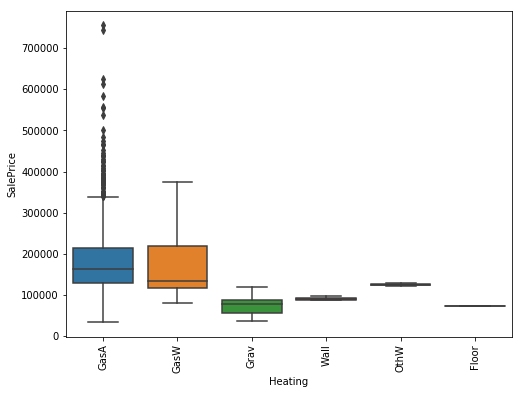

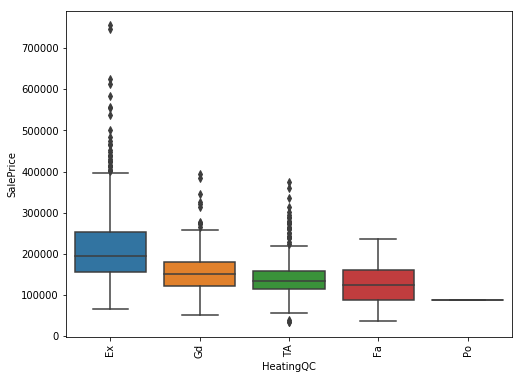

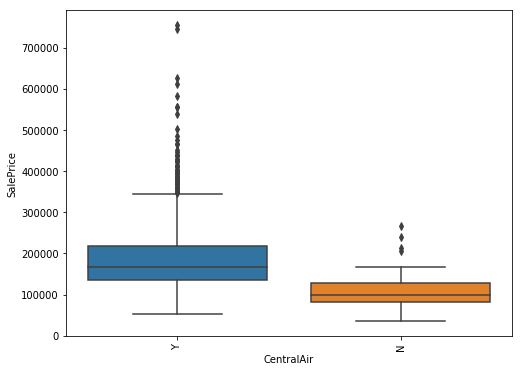

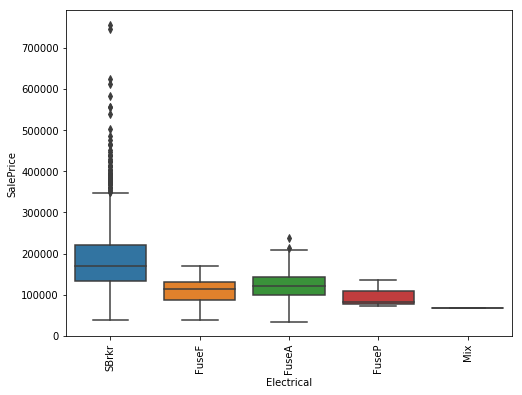

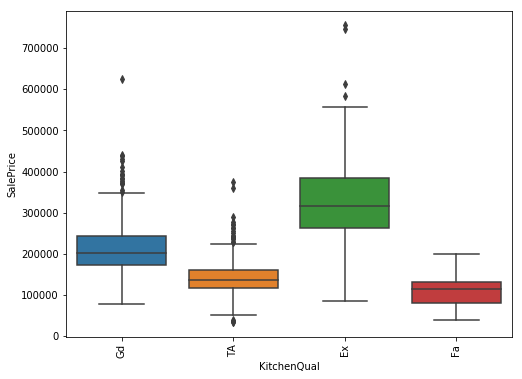

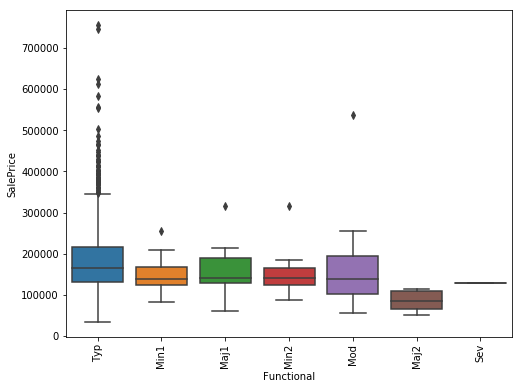

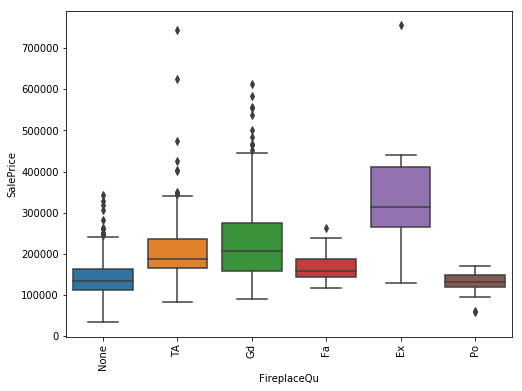

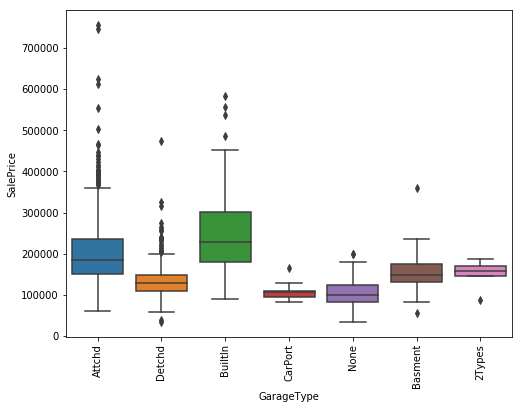

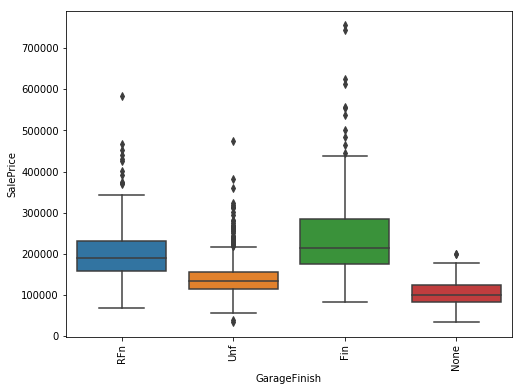

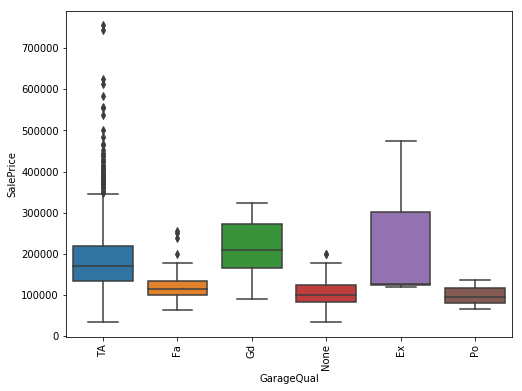

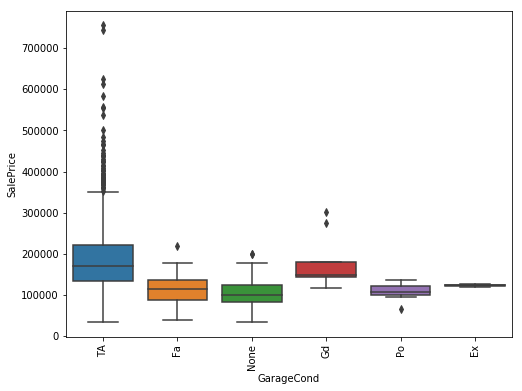

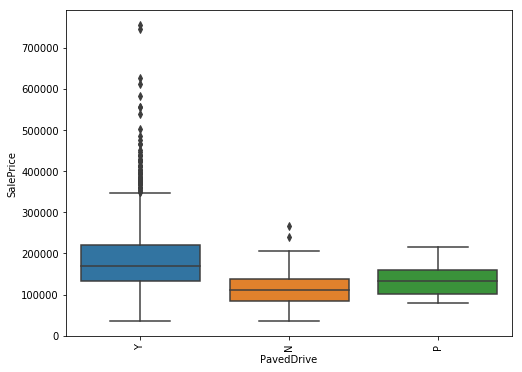

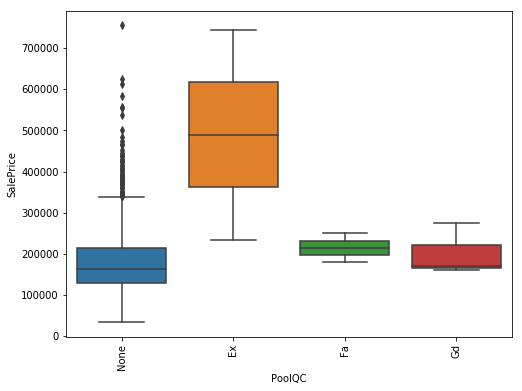

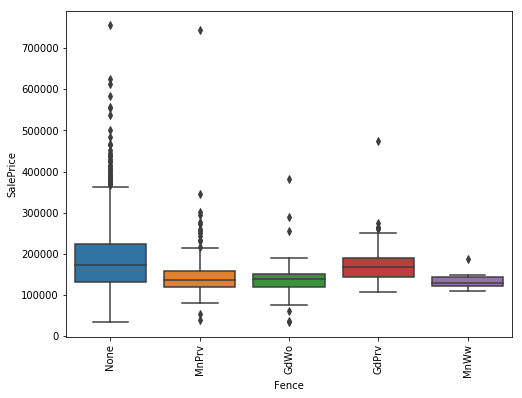

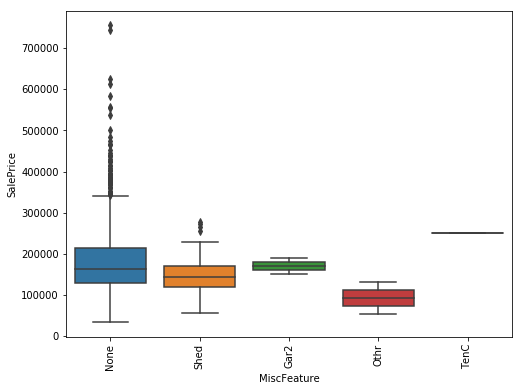

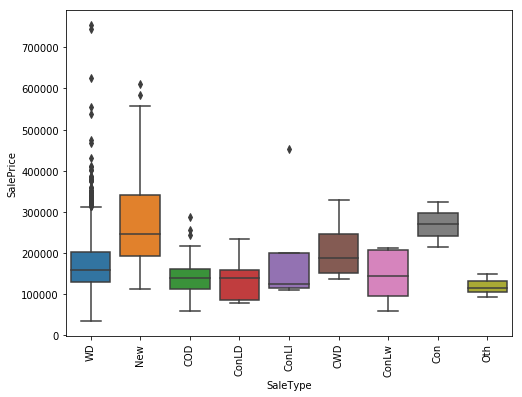

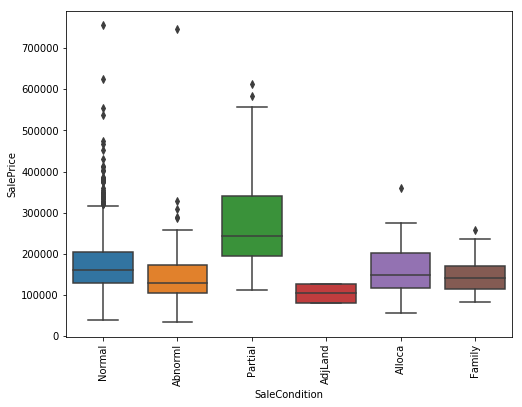

In [54]:
for var in categorical:
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=housing_data)
    x=plt.xticks(rotation=90)

Following observations can be made from the above plots:
    1. SalePrice increases with overall quality.
    2. Neighbourhood has a high influence on SalePrice.
    3. Houses with Excellent Pool, Excellent FirePlace, Excellent Heating, Excellent Kitchen and Excellent external mat-erial quality sell costlier.
    4. Partial Sale condition and New Sale Type houses are costly.

#### Treating Categorical columns and dummification

In [55]:
# Columns 'OverallQual' and 'OverallCond', although categorical, represent quality. The values are from 1-10.
# These columns can be used for numerical representatoin of the overall quality and overall condition.
# Changing these back to numeric (int64).

housing_data[['OverallQual','OverallCond']] = housing_data[['OverallQual','OverallCond']].astype('int64')

In [56]:
# There are Columns that are categorical representation of quality or condition of a feature decribing a house.
# These can be given a numerical value in the relative order of quality/condition.
# A value of 0 can be given for 'None'.
# ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond & PoolQC

housing_data['ExterQual'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['ExterQual']]

housing_data['ExterCond'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['ExterCond']]

housing_data['BsmtQual'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['BsmtQual']]

housing_data['BsmtCond'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['BsmtCond']]

housing_data['BsmtExposure'] = [1 if i == 'No'
                               else 2 if i=='Mn'
                               else 3 if i=='Av'
                               else 4 if i =='Gd'
                               else 0 for i in housing_data['BsmtExposure']]

housing_data['BsmtFinType1'] = [1 if i == 'Unf'
                               else 2 if i=='LwQ'
                               else 3 if i=='Rec'
                               else 4 if i =='BLQ'
                               else 5 if i =='ALQ'
                               else 6 if i =='GLQ'
                               else 0 for i in housing_data['BsmtFinType1']]

housing_data['BsmtFinType2'] = [1 if i == 'Unf'
                               else 2 if i=='LwQ'
                               else 3 if i=='Rec'
                               else 4 if i =='BLQ'
                               else 5 if i =='ALQ'
                               else 6 if i =='GLQ'
                               else 0 for i in housing_data['BsmtFinType2']]

housing_data['HeatingQC'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['HeatingQC']]

housing_data['KitchenQual'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['KitchenQual']]

housing_data['FireplaceQu'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['FireplaceQu']]


housing_data['GarageQual'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['GarageQual']]

housing_data['GarageCond'] = [1 if i == 'Po'
                               else 2 if i=='Fa'
                               else 3 if i=='TA'
                               else 4 if i =='Gd'
                               else 5 if i =='Ex'
                               else 0 for i in housing_data['GarageCond']]

housing_data['PoolQC'] = [1 if i == 'Fa'
                               else 2 if i=='TA'
                               else 3 if i=='Gd'
                               else 4 if i =='Ex'
                               else 0 for i in housing_data['PoolQC']]

In [57]:
# Column Functional and GarageFinish can also be given numerical values since they represent the relative rating
# of the house functionality and the garage finish

housing_data['Functional'] = [1 if i == 'Sal'
                               else 2 if i=='Sev'
                               else 3 if i=='Maj2'
                               else 4 if i =='Maj1'
                               else 5 if i =='Mod'
                               else 6 if i =='Min2'
                               else 7 if i =='Min1'
                               else 8 if i =='Typ'
                               else 0 for i in housing_data['Functional']]

housing_data['GarageFinish'] = [1 if i == 'Unf'
                               else 2 if i=='RFn'
                               else 3 if i=='Fin'
                               else 0 for i in housing_data['GarageFinish']]

In [58]:
# Column CentralAir has only two values, N or Y. They can be represented by 0 or 1 respectively.
housing_data['CentralAir'] = [1 if i == 'Y'
                               else 0 for i in housing_data['CentralAir']]

In [59]:
# For other columns, dummy variables can be created.
# Separating the categorical columns
housing_data_cat = housing_data.select_dtypes(include=['object'])
# Creating dummy variables
housing_data_dummies = pd.get_dummies(housing_data_cat)
housing_data_dummies.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [60]:
# Dropping the redundant columns.
# Please note that drop_first was not used to do this so that columns with "Other", 'None' etc can be dropped for better comprehension of other columns.
dummy_drop_cols = ['MSSubClass_20', 'MSZoning_C (all)', 'LotConfig_Inside', 'Street_Grvl', 'Alley_None', 'LotShape_Reg', 'LandContour_Low', 'Utilities_NoSeWa', 'LandSlope_Sev', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_1Fam', 'HouseStyle_1Story', 'RoofStyle_Flat', 'RoofMatl_Roll', 'Exterior2nd_Other', 'MasVnrType_None', 'Foundation_Wood', 'Heating_OthW', 'Electrical_Mix', 'GarageType_None', 'PavedDrive_N', 'Fence_None', 'MiscFeature_None', 'SaleType_Oth', 'SaleCondition_Normal']
housing_data_dummies.drop(dummy_drop_cols, axis=1, inplace=True)

In [61]:
# Also dropping the original columns
housing_data.drop(housing_data_cat.columns, axis=1, inplace=True)

In [62]:
housing_data = pd.concat([housing_data_dummies, housing_data], axis=1)
housing_data.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,Utilities_AllPub,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,CoveredPorch,PoolQC,MiscVal,AgeAtSale,AgeRemodAtSale,SalePrice
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,65.000,8450.000,7,5,4,3,4,3,1,6,1,856,5,1,1710.000,3,1,3,1,4,8,8,0,0,2,2,548,3,3,0,61.000,0,0,0,5,5,208500
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

#### Checking the distribution of SalePrice

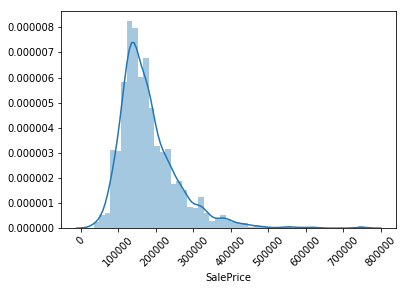

In [63]:
sns.distplot(housing_data['SalePrice'])
_ = plt.xticks(rotation=45)

It can be seen that the distribution is skewed. Log transformation can be used to make the distribution normal.

#### Logarithmic transformation of SalePrice

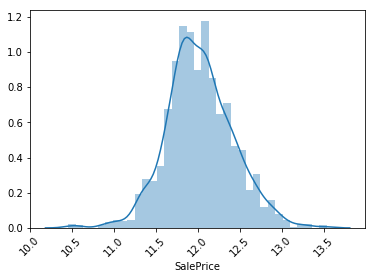

In [64]:
housing_data['SalePrice']=np.log1p(housing_data['SalePrice'])
sns.distplot(housing_data['SalePrice'])
_ = plt.xticks(rotation=45)

In [65]:
#housing_data_bkp = housing_data

#### Train - Test Split

In [66]:
# Train-Test split

data_train, data_test = train_test_split(housing_data, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling the data

In [67]:
# Scaling the continous variables
scaler = StandardScaler()
# scaling is required only for the numerical columns and not for the dummy variables, the columns where the values are just 0's and 1's, and SalePrice since it has already been log transformed.
cols_to_scale = [col for col in housing_data.columns if ("_" not in col) & (col != 'CentralAir') & (col != 'SalePrice')]
# Scale these variables using 'fit_transform'
data_train[cols_to_scale] = scaler.fit_transform(data_train[cols_to_scale])
data_test[cols_to_scale] = scaler.transform(data_test[cols_to_scale])
data_train.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,Utilities_AllPub,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,CoveredPorch,PoolQC,MiscVal,AgeAtSale,AgeRemodAtSale,SalePrice
210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.155,-1.170,-0.780,0.383,-0.698,-0.261,-0.532,0.124,-0.606,-0.280,-0.278,-0.456,-1.179,0,-1.420,-0.008,-0.782,-1.043,-0.234,-0.776,-0.936,0.230,-0.925,-0.983,-1.903,-2.367,-2.218,-3.867,-3.860,-0.802,-0.809,0.662,-0.058,-0.084,1.530,1.704,11.493
318,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [68]:
y_train = data_train.pop('SalePrice')
X_train = data_train
y_test = data_test.pop('SalePrice')
X_test = data_test

### Ridge Regression

In [69]:
# Performing Ridge Regressoin first
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019,0.006,0.000,0.000,0.000,{'alpha': 0.0001},-0.100,-0.089,-0.099,-0.086,-0.087,-0.092,0.006,26,-0.059,-0.062,-0.060,-0.063,-0.063,-0.061,0.002
1,0.016,0.000,0.000,0.000,0.001,{'alpha': 0.001},-0.099,-0.089,-0.098,-0.086,-0.087,-0.092,0.006,25,-0.059,-0.062,-0.060,-0.063,-0.063,-0.061,0.002
2,0.009,0.008,0.003,0.006,0.010,{'alpha': 0.01},-0.099,-0.089,-0.096,-0.085,-0.086,-0.091,0.006,24,-0.059,-0.062,-0.060,-0.063,-0.063,-0.061,0.002
3,0.009,0.008,0.000,0.000,0.050,{'alpha': 0.05},-0.097,-0.089,-0.095,-0.082,-0.084,-0.089,0.006,23,-0.060,-0.062,-0.060,-0.063,-0.063,-0.062,0.002
4,0.009,0.008,0.000,0.000,0.100,{'alpha': 0.1},-0.096,-0.089,-0.095,-0.080,-0.083,-0.089,0.006,22,-0.060,-0.063,-0.060,-0.064,-0.064,-0.062,0.002


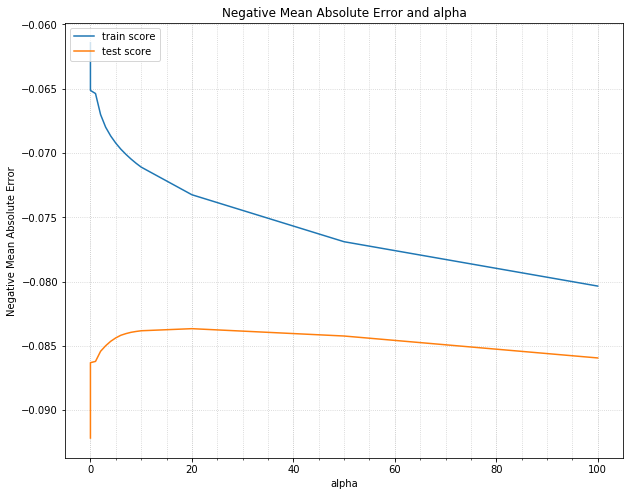

In [71]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 101, 20)
minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both',color='#CCCCCC', linestyle=':')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [72]:
# Using alpha as 20 since the plot for test error peaks at 20 and then falls
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9273079552135585
0.8918435734097098


In [73]:
# Checking the RMSE
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13340102397446835


In [74]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 4) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
pd.DataFrame(list(zip(cols, model_parameters))).sort_values(by=1, ascending=False)

,0,1
0,constant,11.979
188,GrLivArea,0.107
176,OverallQual,0.071
41,Neighborhood_Crawfor,0.058
185,TotalBsmtSF,0.054
177,OverallCond,0.047
187,CentralAir,0.045
101,Exterior1st_BrkFace,0.044
51,Neighborhood_NridgHt,0.043
50,Neighborhood_NoRidge,0.042


It can be seen that features like GrLivArea, OverallCond, OverallQual, Neighborhood, TotalBsmtSF and CentralAir have a lot of influence on the SalePrice as per the model created using Ridge Regression

### Lasso Regression

In [75]:
# Proceeding with Lasso
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [76]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.166,0.038,0.000,0.000,0.000,{'alpha': 0.0001},-0.090,-0.088,-0.092,-0.077,-0.078,-0.085,0.006,2,-0.062,-0.064,-0.063,-0.066,-0.066,-0.064,0.002
1,0.050,0.009,0.000,0.000,0.001,{'alpha': 0.001},-0.079,-0.089,-0.092,-0.075,-0.081,-0.083,0.006,1,-0.077,-0.075,-0.072,-0.077,-0.078,-0.076,0.002
2,0.028,0.006,0.000,0.000,0.010,{'alpha': 0.01},-0.082,-0.098,-0.098,-0.083,-0.095,-0.091,0.007,3,-0.091,-0.087,-0.087,-0.091,-0.089,-0.089,0.002
3,0.022,0.008,0.006,0.008,0.050,{'alpha': 0.05},-0.101,-0.124,-0.115,-0.107,-0.118,-0.113,0.008,4,-0.115,-0.109,-0.110,-0.114,-0.113,-0.112,0.003
4,0.022,0.008,0.003,0.006,0.100,{'alpha': 0.1},-0.144,-0.163,-0.151,-0.147,-0.154,-0.152,0.007,5,-0.151,-0.148,-0.149,-0.150,-0.153,-0.150,0.002


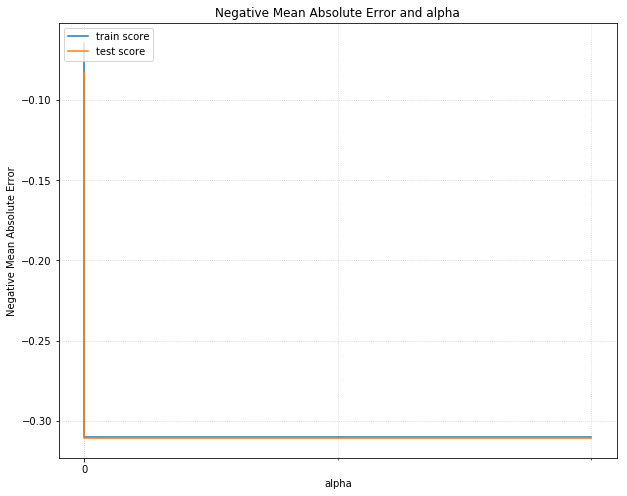

In [77]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 101, 20)
minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both',color='#CCCCCC', linestyle=':')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [78]:
# Using alpha as 0.001 since the plot for test error peaks at 20 and then falls
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9196523111885201
0.890798030877053


In [79]:
# Checking the RMSE
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1340442635417022


In [80]:
# Lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 4) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
pd.DataFrame(list(zip(cols, model_parameters))).sort_values(by=1, ascending=False)

,0,1
0,constant,11.959
188,GrLivArea,0.121
41,Neighborhood_Crawfor,0.078
176,OverallQual,0.078
101,Exterior1st_BrkFace,0.064
56,Neighborhood_Somerst,0.061
185,TotalBsmtSF,0.060
51,Neighborhood_NridgHt,0.051
177,OverallCond,0.048
187,CentralAir,0.041


It can be seen that columns like GrLivArea, Neighborhood, OverallQual, Exterior1st, TotalBsmtSF, OverallCond, CentralAir have a higher influence on the model build using Lasso Regression. Also, there are several columns where the coefficient is 0. This explains the feature selection done by Lasso.